In [1]:
#
#  output 5 class, 1248 input, 20 input attirbutes, 
#  (2) Hidden Layer, (1) Output layer
#  Xavier Initializer
#  running_rate = 0.01
#  relu activation / softmax output
#  Accuracy: 94.61 
#  Mini-batch GD: training_number : 18000, batch_size: 200
#
#  ** Mini-batch GD is much faster than Naive GD 
# 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display

import tensorflow as tf

In [3]:
nb_classes = 5

y1, sr1 = librosa.load('data/1/1.wav')
print("load1 done!")

y2, sr2 = librosa.load('data/2/2.wav')
print("load2 done!")

y3, sr3 = librosa.load('data/3/3.wav')
print("load3 done!")

y4, sr4 = librosa.load('data/4/4.wav')
print("load4 done!")

y5, sr5 = librosa.load('data/5/5.wav')
print("load5 done!")

#y6, sr6 = librosa.load('data/6/6.wav')
#y7, sr7 = librosa.load('data/7/7.wav')

print(sr1, sr2, sr3, sr4, sr5)

load1 done!
load2 done!
load3 done!
load4 done!
load5 done!
22050 22050 22050 22050 22050


In [4]:
#mfcc

mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)
mfcc3 = librosa.feature.mfcc(y=y3, sr=sr3)
mfcc4 = librosa.feature.mfcc(y=y4, sr=sr4)
mfcc5 = librosa.feature.mfcc(y=y5, sr=sr5)
#mfcc6 = librosa.feature.mfcc(y=y6, sr=sr6)
#mfcc7 = librosa.feature.mfcc(y=y7, sr=sr7)


print(mfcc1.shape)
print(mfcc2.shape)
print(mfcc3.shape)
print(mfcc4.shape)
print(mfcc5.shape)
#print(mfcc6.shape)
#print(mfcc7.shape)


(20, 30736)
(20, 16410)
(20, 12488)
(20, 45240)
(20, 19988)


In [5]:
# resize data size
mfcc = [mfcc1, mfcc2, mfcc3, mfcc4, mfcc5]
y = [y1, y2, y3, y4, y5]

min = 9999999

for i in range (0, 5):
    if min > mfcc[i].shape[1]:
        min = mfcc[i].shape[1] 
    
min = int(min/10)
    
for i in range (0, 5):
    mfcc[i] = mfcc[i][:, 0:min]
    print(mfcc[i].shape)


(20, 1248)
(20, 1248)
(20, 1248)
(20, 1248)
(20, 1248)


In [6]:
# labeling

for i in range (0, nb_classes):
    mfcc[i] = mfcc[i].transpose()
    print(mfcc[i].shape)


for i in range (0, nb_classes):
    y[i] = np.ones((min, 1), dtype='int') * (i+1) -1

for i in range (0, nb_classes):
    mfcc[i] = np.hstack([mfcc[i], y[i]])
    print(mfcc[i].shape)



(1248, 20)
(1248, 20)
(1248, 20)
(1248, 20)
(1248, 20)
(1248, 21)
(1248, 21)
(1248, 21)
(1248, 21)
(1248, 21)


In [7]:
# input data shuffling


mfcc_append = []

for i in range (0, nb_classes):
    
    if i == 0:
        mfcc_append = np.vstack([mfcc[i], mfcc[i+1]])
    
    elif i == 1:
        continue
        
    else:
        mfcc_append = np.vstack([mfcc_append, mfcc[i]])


print(mfcc_append.shape)

print(mfcc_append[20])


np.random.shuffle(mfcc_append)

mfcc_shuffle = mfcc_append
print(mfcc_shuffle.shape)

(6240, 21)
[-219.68866402  203.64932289   19.94048606   -7.54751873    8.66269929
    0.3350453    -5.36576533  -10.52724764  -11.05766178   -8.696093
   -7.86116865   -7.00606116   -6.86664637   -8.78624098  -20.69763658
  -16.36345817    9.49607862    1.04988936  -18.39665721   -0.70150924
    0.        ]
(6240, 21)


In [8]:
# labeled value one-hot encoding

nb_classes = 5


mfcc_shuffle_T = mfcc_shuffle.transpose()

x_data_t = mfcc_shuffle_T[:-1]
y_data_t = mfcc_shuffle_T[-1:]
x_data = x_data_t.transpose()
y_data_t = y_data_t.flatten()



y_data_one_hot = tf.one_hot(y_data_t, nb_classes, dtype=tf.float32)

tf.InteractiveSession().as_default()
tf.tables_initializer().run()

y_data_one_hot = y_data_one_hot.eval()


print("FINAL IN/OUTPUT SHAPE")
print(x_data.shape)
print(y_data_one_hot.shape)

print("\nFINAL IN/OUTPUT DATA")
print(x_data)
print(y_data_one_hot)

FINAL IN/OUTPUT SHAPE
(6240, 20)
(6240, 5)

FINAL IN/OUTPUT DATA
[[-260.69645364   65.39325452   23.63072404 ...    0.82276593
    -0.5095031     9.19355541]
 [-306.57153442  108.61023455   20.67245652 ...   -2.87304427
     9.59392857   15.5264599 ]
 [  99.88845624   70.01967765    9.89993446 ...    2.80956492
    -9.54801317   11.49523116]
 ...
 [-350.48605457  115.71289431   65.65739526 ...    3.23565349
    -5.11818939   -4.57868813]
 [-354.56723407  109.34801212   37.74008424 ...   -5.36599118
    -1.10212734    2.84229992]
 [-306.51275119   91.70856631  -19.77079851 ...   -8.35262924
    13.5433133    33.51694054]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [21]:
# FCN

training_number = 18000
learning_rate = 0.01


with tf.variable_scope("sound_classifications-5-7") as scope:
    tf.variable_scope(scope, reuse=True)
    # MNIST data image of shape 28 * 28 = 784
    X = tf.placeholder(tf.float32, [None, 20])
    # 0 - 9 digits recognition = 10 classes
    Y = tf.placeholder(tf.float32, [None, nb_classes])

    W1 = tf.get_variable("W1", shape=[20, 500], initializer=tf.contrib.layers.xavier_initializer())
    b1 = tf.Variable(tf.random_normal([500]))
    L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

    W2 = tf.get_variable("W2", shape=[500, 500], initializer=tf.contrib.layers.xavier_initializer())
    b2 = tf.Variable(tf.random_normal([500]))
    L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)


    W3 = tf.get_variable("W3", shape=[500, nb_classes], initializer=tf.contrib.layers.xavier_initializer())
    b3 = tf.Variable(tf.random_normal([nb_classes]))
    hypothesis = tf.matmul(L2, W3) + b3

In [22]:
# Cross entropy cost/loss
#cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=hypothesis))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [23]:
# Launch graph

batch_size = 200

cost_history = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(int(training_number/batch_size)):
        batch_count = int(x_data.shape[0]/batch_size)
        
        for i in range(batch_count):
    
            batch_xs, batch_ys = x_data[i* batch_size: i*batch_size+batch_size], y_data_one_hot[i*batch_size:i*batch_size+batch_size]
        
            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

            curr_cost = sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})
            
            
        if epoch % 10 == 0:    
            print(epoch, curr_cost)
            cost_history.append(curr_cost)
                                
                                
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: x_data, Y: y_data_one_hot})) 

0 2.3604944
10 0.7541567
20 0.39245024
30 0.37321106
40 0.3322247
50 0.19215442
60 0.17666465
70 0.14508627
80 0.12709258
Accuracy:  0.9461538


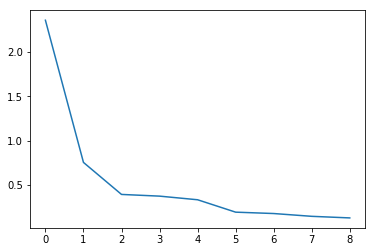

In [24]:
plt.plot(cost_history)
plt.show()